玫瑰图是什么意思？
玫瑰图，在学术上更常被称为极坐标面积图（Polar Area Chart）或南丁格尔玫瑰图（Nightingale Rose Chart）。

它是一种在极坐标系（就是带角度和半径的坐标系）上绘制的图表。虽然它看起来有点像饼图，但其工作原理与柱状图更为接近。

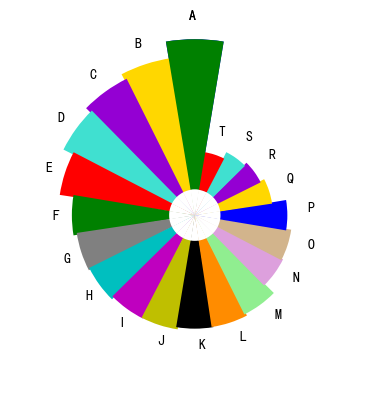

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
数据=pd.read_excel(r'./repo2/30.玫瑰图.xlsx')
角度=np.linspace(0,2*np.pi,len(数据.业绩),endpoint=False)
图=plt.axes(polar=True) # 实例化极坐标系
# 图.set_theta_direction(-1) # 顺时针为极坐标正方向
图.set_theta_zero_location('N') # 让0度指向N
列表=np.random.random((len(数据.业绩)))
颜色=['b','gold','darkviolet','turquoise','r','g','grey','c','m','y','k','darkorange','lightgreen','plum','tan']
业绩 = np.concatenate((数据.业绩,[数据.业绩[0]]))
角度 = np.concatenate((角度,[角度[0]]))
姓名 = np.concatenate((数据.姓名,[数据.姓名[0]]))
plt.bar(角度,业绩,width=0.33,color=颜色)
plt.bar(x=角度, height=130, width=0.33, color='white')  # 挖孔
# 数据标签
for 角度, 业绩, 姓名 in zip(角度, 业绩, 姓名):
    plt.text(角度+0.03, 业绩+100, str(姓名) )
plt.gca().set_axis_off()
plt.show()

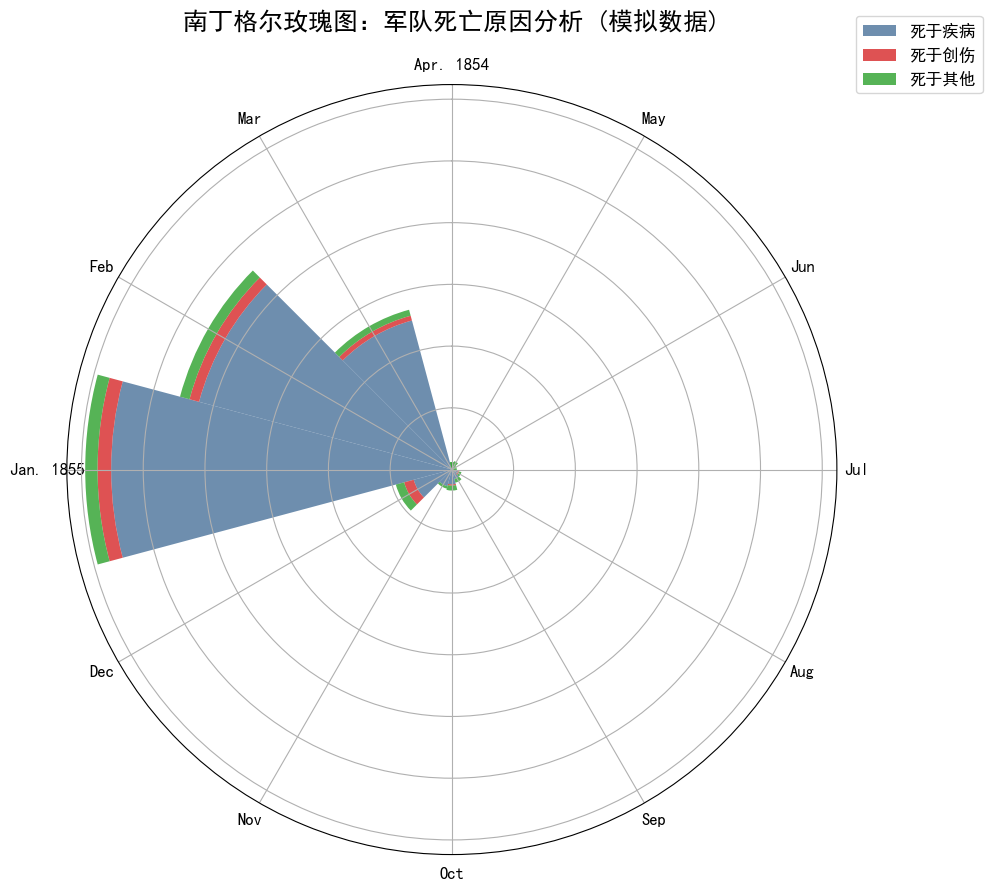

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据
# 模拟克里米亚战争12个月的数据
# 数据来源：模拟南丁格尔的原始数据结构
months = [
    'Apr. 1854', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
    'Oct', 'Nov', 'Dec', 'Jan. 1855', 'Feb', 'Mar'
]
# 死于可预防疾病的人数 (蓝色区域)
deaths_disease = np.array([
    1, 1, 0, 1, 5, 8, 12, 14, 32, 276, 212, 125
])
# 死于战争创伤的人数 (红色区域)
deaths_wounds = np.array([
    0, 0, 0, 0, 1, 0, 1, 0, 8, 11, 8, 4
])
# 死于其他原因的人数 (黑色区域)
deaths_other = np.array([
    5, 6, 4, 3, 2, 3, 4, 2, 7, 10, 8, 5
])

# 2. 创建极坐标系
# 我们需要将角度分成12份，对应12个月
angles = np.linspace(0, 2 * np.pi, len(months), endpoint=False)
# 为了让图表闭合，添加第一个数据点到末尾
angles = np.concatenate((angles, [angles[0]]))
deaths_disease = np.concatenate((deaths_disease, [deaths_disease[0]]))
deaths_wounds = np.concatenate((deaths_wounds, [deaths_wounds[0]]))
deaths_other = np.concatenate((deaths_other, [deaths_other[0]]))

# 3. 设置 Matplotlib 绘图区
# 使用 subplot_kw 创建一个极坐标子图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# 4. 绘制堆叠的条形图
# 设置每个条形的宽度，使其刚好填满整个圆周
bar_width = 2 * np.pi / len(months)

# 绘制最底层的“疾病”数据
ax.bar(angles, deaths_disease, width=bar_width, color='#4A729A', alpha=0.8, label='死于疾病')

# 在“疾病”数据之上，绘制“创伤”数据
# 使用 bottom 参数将其堆叠起来
ax.bar(angles, deaths_wounds, width=bar_width, bottom=deaths_disease, color='#D62728', alpha=0.8, label='死于创伤')

# 在前两者之上，绘制“其他”数据
ax.bar(angles, deaths_other, width=bar_width, bottom=deaths_disease + deaths_wounds, color='#2CA02C', alpha=0.8, label='死于其他')

# 5. 美化图表
# 设置图表的零度位置在正上方 (North)
ax.set_theta_zero_location('N')
# 设置图表的角度方向为顺时针 (-1 表示顺时针)
ax.set_theta_direction(-1)

# 设置月份标签
# 我们将标签放在每个扇区的中间
ax.set_xticks(angles[:-1]) # 使用[:-1]避免重复最后一个标签
ax.set_xticklabels(months, fontsize=12)

# 隐藏半径的刻度标签，让图表更简洁
ax.set_yticklabels([])

# 添加图例和标题
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=12)
ax.set_title("南丁格尔玫瑰图：军队死亡原因分析 (模拟数据)", fontsize=18, pad=20)

# 6. 显示图表
plt.show()

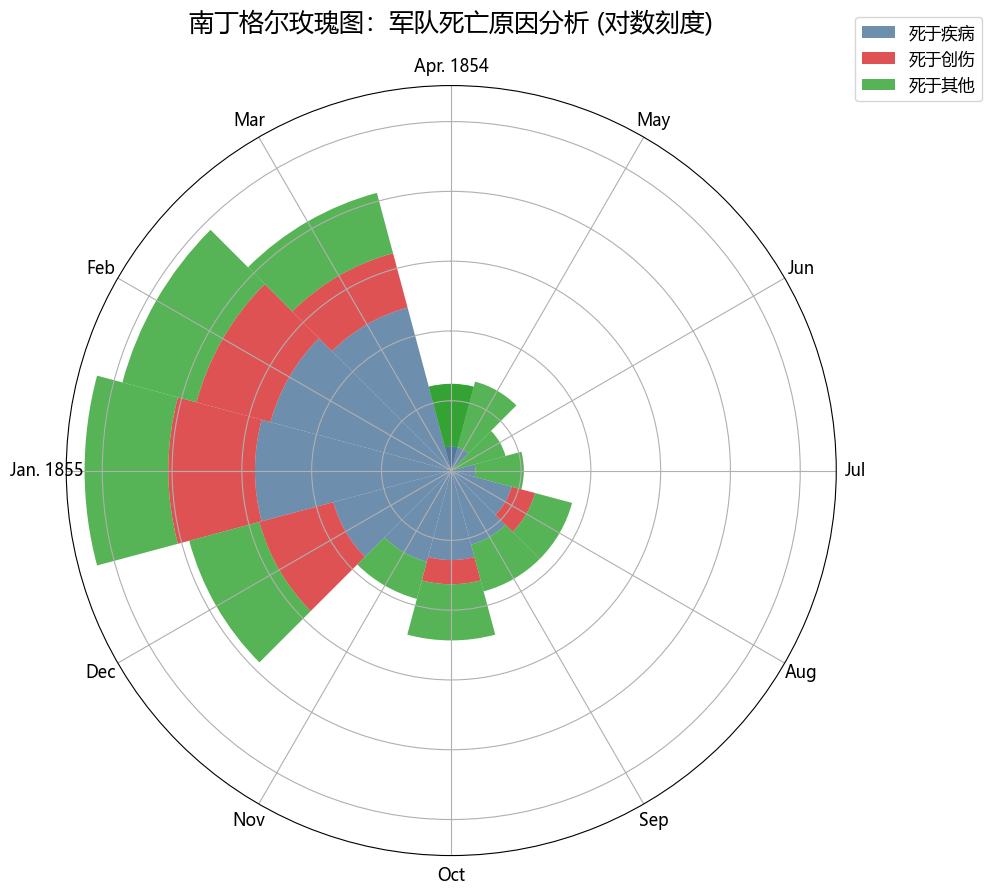

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 或者 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 1. 准备数据 (与之前相同)
months = [
    'Apr. 1854', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
    'Oct', 'Nov', 'Dec', 'Jan. 1855', 'Feb', 'Mar'
]
deaths_disease = np.array([
    1, 1, 0, 1, 5, 8, 12, 14, 32, 276, 212, 125
])
deaths_wounds = np.array([
    0, 0, 0, 0, 1, 0, 1, 0, 8, 11, 8, 4
])
deaths_other = np.array([
    5, 6, 4, 3, 2, 3, 4, 2, 7, 10, 8, 5
])

# --- 修改部分：对数据进行对数转换 ---
# 使用 np.log1p (即 log(1+x)) 来处理数据，避免 log(0) 的错误
log_deaths_disease = np.log1p(deaths_disease)
log_deaths_wounds = np.log1p(deaths_wounds)
log_deaths_other = np.log1p(deaths_other)
# ------------------------------------

# 2. 创建极坐标系
angles = np.linspace(0, 2 * np.pi, len(months), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# 对转换后的数据也进行闭合处理
log_deaths_disease = np.concatenate((log_deaths_disease, [log_deaths_disease[0]]))
log_deaths_wounds = np.concatenate((log_deaths_wounds, [log_deaths_wounds[0]]))
log_deaths_other = np.concatenate((log_deaths_other, [log_deaths_other[0]]))


# 3. 设置 Matplotlib 绘图区
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# 4. 绘制堆叠的条形图 (使用对数转换后的数据)
bar_width = 2 * np.pi / len(months)

ax.bar(angles, log_deaths_disease, width=bar_width, color='#4A729A', alpha=0.8, label='死于疾病')
ax.bar(angles, log_deaths_wounds, width=bar_width, bottom=log_deaths_disease, color='#D62728', alpha=0.8, label='死于创伤')
ax.bar(angles, log_deaths_other, width=bar_width, bottom=log_deaths_disease + log_deaths_wounds, color='#2CA02C', alpha=0.8, label='死于其他')

# 5. 美化图表
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(months, fontsize=12)

# 注意：由于使用了对数刻度，半径的数值标签代表的是对数值，而非原始人数。
# 通常在这种情况下，我们会隐藏半径标签或进行自定义。
ax.set_yticklabels([])

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=12)
ax.set_title("南丁格尔玫瑰图：军队死亡原因分析 (对数刻度)", fontsize=18, pad=20)

# 6. 显示图表
plt.show()